1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: Citrus greening
Support (Predicted Class Probability): 95.41%
Confidence: 95.41%


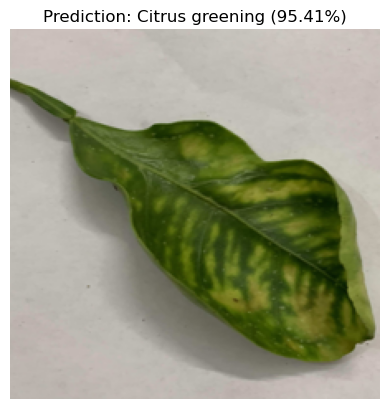

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the trained model
model_path = r'C:/Users/abdju/OneDrive/Desktop/model/citrus_disease_model_densenet.keras'
model = tf.keras.models.load_model(model_path)

# Define class labels
class_labels = ['Citrus canker', 'Citrus greening', 'Citrus mealybugs', 
                'Die back', 'Foliage damaged', 'Healthy leaf', 
                'Powdery mildew', 'Shot hole', 'Spiny whitefly', 'Yellow leaves']
# Preprocess the input image
# Preprocess the input image
def preprocess_image(image_path, target_size):
    image = Image.open(image_path).convert("RGB")
    image = image.resize(target_size)
    image_array = np.array(image) / 255.0  # Normalize to [0, 1]
    return np.expand_dims(image_array, axis=0), image

# Predict and display results
def predict_image(image_path):
    input_size = (224, 224)  # Update with your model's input size
    processed_image, original_image = preprocess_image(image_path, input_size)
    
    # Get predictions
    predictions = model.predict(processed_image)
    predicted_class_index = np.argmax(predictions)
    predicted_class_name = class_labels[predicted_class_index]
    confidence = predictions[0][predicted_class_index]
    
    # Calculate support (probability of predicted class)
    support_percentage = confidence * 100  # Convert to percentage
    
    # Print results
    print(f"Predicted Class: {predicted_class_name}")
    print(f"Support (Predicted Class Probability): {support_percentage:.2f}%")
    print(f"Confidence: {confidence * 100:.2f}%")
    
    # Display the image
    plt.imshow(original_image)
    plt.title(f"Prediction: {predicted_class_name} ({support_percentage:.2f}%)")
    plt.axis("off")
    plt.show()
# Input image path
image_path = r"C:/Users/abdju/OneDrive/Desktop/I3.jpeg"
# Call the function
predict_image(image_path)